# `fill_blind_pores`
Remove any isolated void space (not connected to the boundary) from the image which is often needed such as for network extraction or direct numerical simulations

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt

In [2]:
import inspect
print(inspect.signature(ps.filters.fill_blind_pores))

(im, conn=None, surface=False)


## `im`
The void phase is indicated by ``True`` values.  Blind pores are considered as any cluster of void voxels not connected to the boundary of the image.

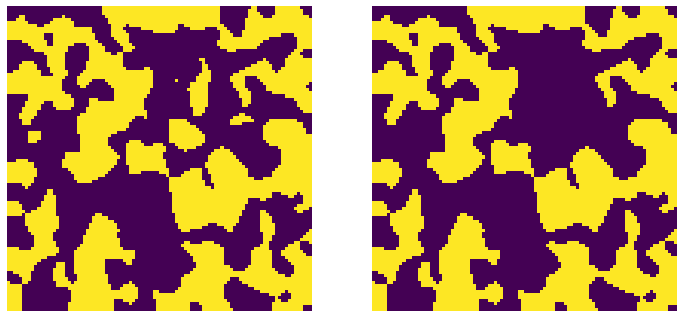

In [3]:
np.random.seed(2)
im = ps.generators.blobs([100, 100], porosity=0.5)
im1 = ps.filters.fill_blind_pores(im)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(im1, origin='lower', interpolation='none')
ax[1].axis(False);

## `conn`
Controls how 'connected' a group of voxels must be.  In 2D the options are 4 and 8, while in 3D they are 6 and 26.

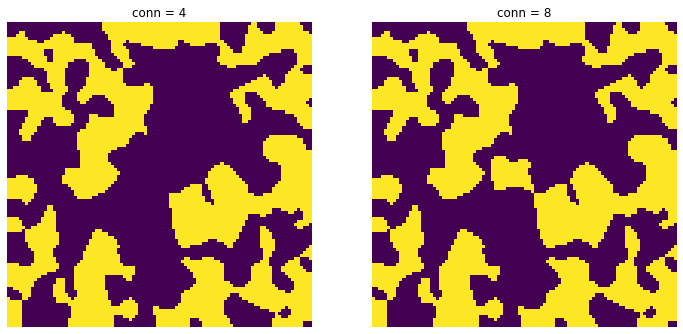

In [4]:
im1 = ps.filters.fill_blind_pores(im=im, conn=4)
im2 = ps.filters.fill_blind_pores(im=im, conn=8)

fig, ax = plt.subplots(1, 2, figsize=[12, 6]);
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)
ax[0].set_title('conn = 4')
ax[1].imshow(im2, origin='lower', interpolation='none')
ax[1].axis(False)
ax[1].set_title('conn = 8');

## `surface`
This flag, then ``True`` also removes any void voxels that are on the surface but not connected to the main body of the void space.  This option can produce mis-leading results since it basically just keeps the largest cluster.  For better control it is recommended to use the ``trim_nonpercolation_paths`` function.

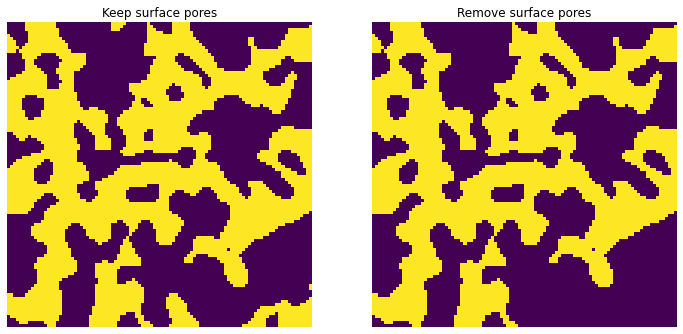

In [5]:
np.random.seed(0)
im = ps.generators.blobs([100, 100], porosity=0.5)
im1 = ps.filters.fill_blind_pores(im=im, surface=False)
im2 = ps.filters.fill_blind_pores(im=im, surface=True)

fig, ax = plt.subplots(1, 2, figsize=[12, 6]);
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)
ax[0].set_title('Keep surface pores')
ax[1].imshow(im2, origin='lower', interpolation='none')
ax[1].axis(False)
ax[1].set_title('Remove surface pores');